In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# reading the JSON data using json.load()
file = 'dim20052018.json'
with open(file) as train_file:
    dict_train = json.load(train_file)

# converting json dataset from dictionary to dataframe
users = pd.DataFrame.from_dict(dict_train['Users'], orient='index')
users.reset_index(level=0, inplace=True)

In [3]:
users['has_played'] = users['xp'] > 0

In [4]:
subs = users.groupby('team')['has_played'].count()
subs

team
1     44
2    225
3     54
4    213
Name: has_played, dtype: int64

In [5]:
players = users.groupby('team')['has_played'].sum()
players

team
1     22.0
2    161.0
3     33.0
4    156.0
Name: has_played, dtype: float64

In [6]:
players/subs * 100
#relative real participation among sections (percent)

team
1    50.000000
2    71.555556
3    61.111111
4    73.239437
Name: has_played, dtype: float64

In [7]:
players = users[users['has_played']]

In [8]:
#stats about xp
players.groupby('team')['xp'].describe()

,count,mean,std,min,25%,50%,75%,max
team,,,,,,,,
1,22.0,3132.272727,5059.666074,20.0,100.0,290.0,4366.25,15660.0
2,161.0,4406.739130,8176.355321,5.0,130.0,970.0,5315.00,57690.0
3,33.0,3236.060606,5694.660432,5.0,120.0,240.0,2355.00,21925.0
4,156.0,4891.858974,9444.557730,5.0,167.5,1837.5,6403.75,68025.0


In [9]:
#stats about level
players.groupby('team')['level'].describe()

,count,mean,std,min,25%,50%,75%,max
team,,,,,,,,
1,22.0,1.681818,2.032741,0.0,0.0,1.0,3.75,5.0
2,161.0,2.099379,1.920953,0.0,0.0,2.0,4.00,5.0
3,33.0,1.575758,1.968983,0.0,0.0,1.0,3.00,5.0
4,156.0,2.320513,1.863009,0.0,0.0,2.0,4.00,5.0


In [10]:
def plot_stat(stat, threshold, text, what = 'a terminal', whats = 'terminals', whats2 = 'terminals'):
    statC = [row['stat'].get(stat) for index, row in players.dropna().iterrows() if(not row['stat'] == pd.np.nan and row['stat'].get(stat))]
    print(str(len(statC)) + ' players ' + text + ' ' + what)
    plt.plot(sorted(statC))
    plt.xlabel('players who ' + text + ' ' + what)
    plt.ylabel('number of '  + text + ' ' + whats2 + ' for some user')
    plt.show()

    print(str(len(list(filter(lambda x: x >= threshold, statC)))) + ' players ' + text + ' more than ' + str(threshold) + ' ' + whats)
    print('Others:')
    plt.boxplot(list(filter(lambda x: x < threshold, statC)))
    plt.ylabel('number of '  + text + ' ' + whats2+ ' for some user')
    plt.show()

150 players buffed (attack+) a terminal


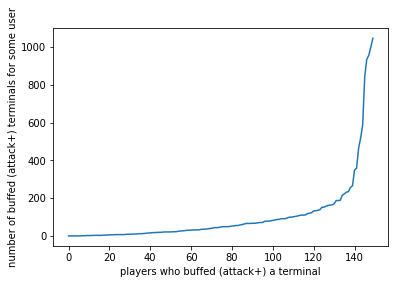

10 players buffed (attack+) more than 300 terminals
Others:


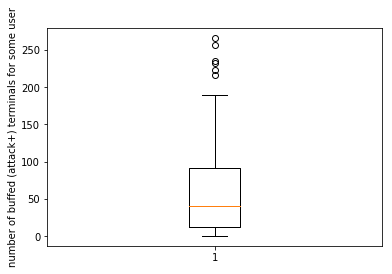

In [11]:
plot_stat('numberOfTerminalBuffed', 300, 'buffed (attack+)')

168 players smashed a terminal


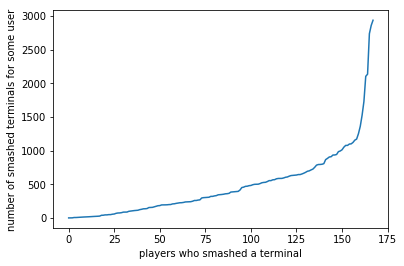

7 players smashed more than 1500 times some terminal
Others:


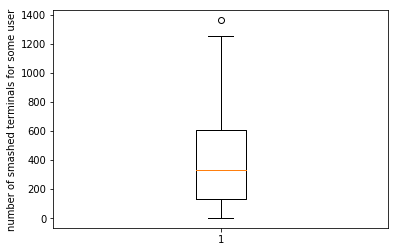

In [12]:
plot_stat('numberOfTerminalDamaged', 1500, 'smashed', 'a terminal', 'times some terminal', 'terminals')

160 players improved (health +) a terminal


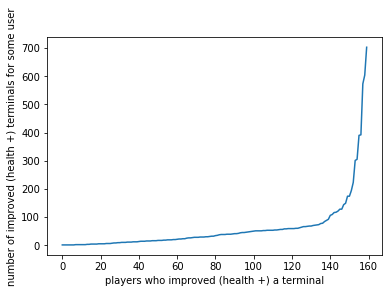

7 players improved (health +) more than 300 terminals
Others:


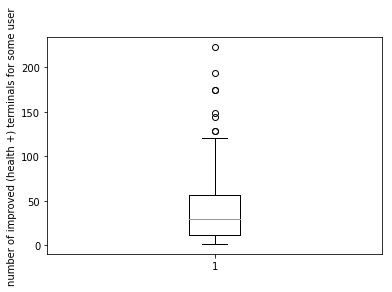

In [13]:
plot_stat('numberOfTerminalImproved', 300, 'improved (health +)')

152 players placed a terminal


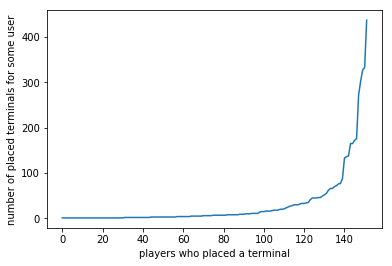

13 players placed more than 80 terminals
Others:


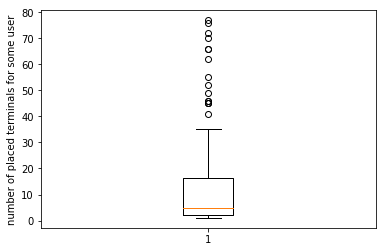

In [14]:
plot_stat('numberOfTerminalPlaced', 80, 'placed')

193 players healed a zone


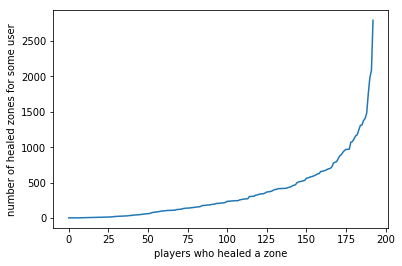

10 players healed more than 1200 times some zone
Others:


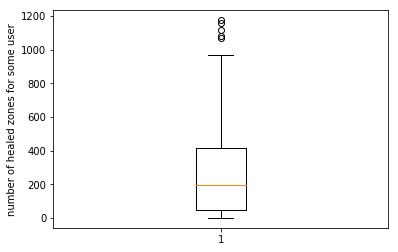

In [15]:
plot_stat('numberOfZoneHealed', 1200, 'healed', 'a zone', 'times some zone', 'zones')

166 players improved a zone


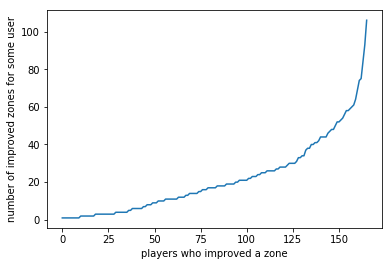

3 players improved more than 80 times some zone
Others:


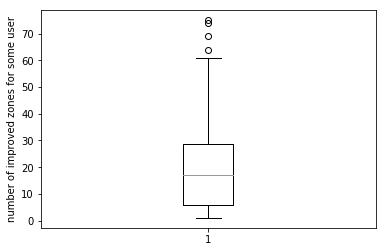

In [16]:
plot_stat('numberOfZoneImproved', 80, 'improved', 'a zone', 'times some zone', 'zones')